# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 647


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
      
       # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_K = city_weather["main"]["temp_max"]
        city_max_temp_C = city_max_temp_K-273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_C,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | martinsicuro
Processing Record 3 of Set 1 | pathein
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | shache
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | otta
Processing Record 16 of Set 1 | guinticgan
Processing Record 17 of Set 1 | piney green
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | ni

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,1.13,97,100,7.11,RU,1685202343
1,martinsicuro,42.8811,13.9145,23.82,75,5,4.97,IT,1685202344
2,pathein,16.7833,94.7333,28.06,80,76,3.52,MM,1685202345
3,busselton,-33.6500,115.3333,14.25,73,47,0.47,AU,1685202347
4,salalah,17.0151,54.0924,30.05,79,40,5.14,OM,1685202348


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,1.13,97,100,7.11,RU,1685202343
1,martinsicuro,42.8811,13.9145,23.82,75,5,4.97,IT,1685202344
2,pathein,16.7833,94.7333,28.06,80,76,3.52,MM,1685202345
3,busselton,-33.6500,115.3333,14.25,73,47,0.47,AU,1685202347
4,salalah,17.0151,54.0924,30.05,79,40,5.14,OM,1685202348


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

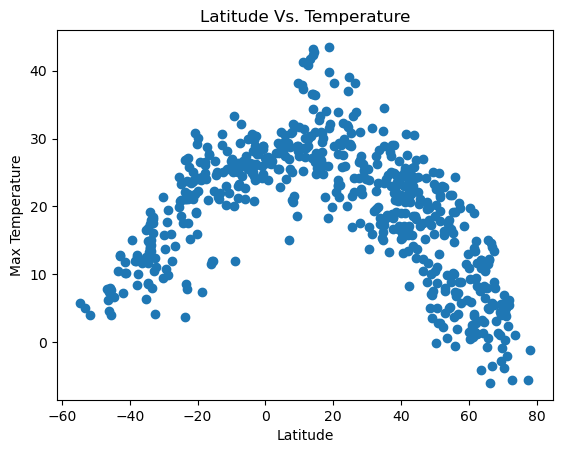

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

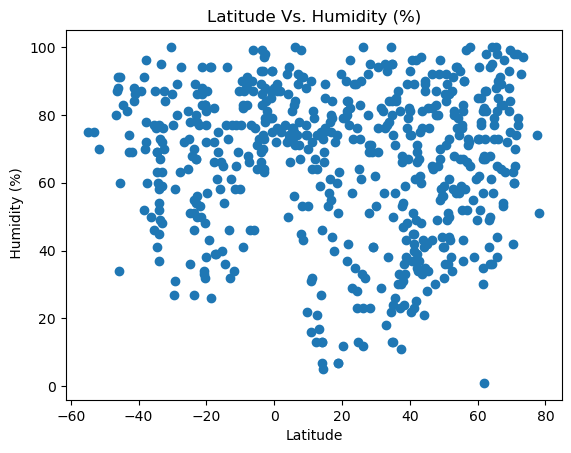

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel(" Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

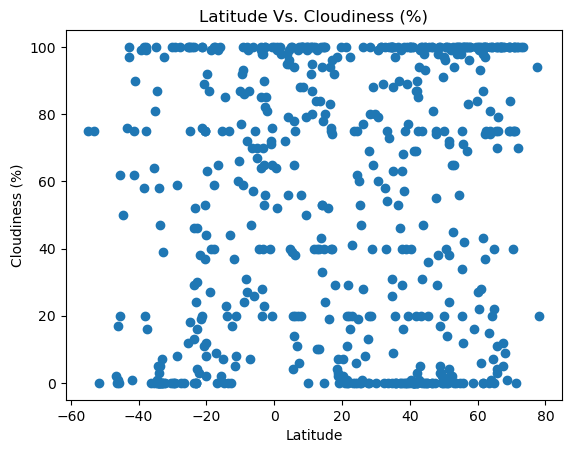

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

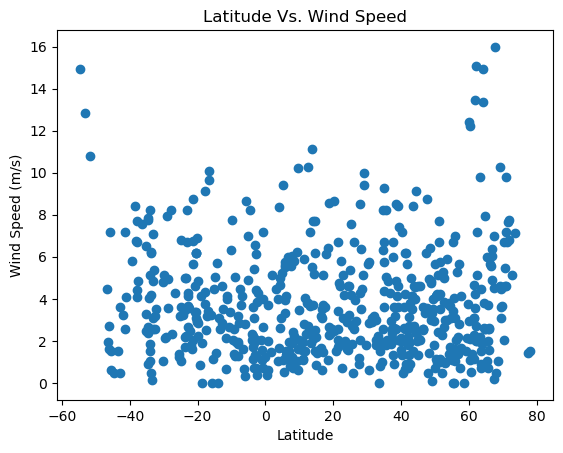

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_lin_reg_plot(x,y):
    #linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
     #create Plot
    plt.scatter(x,y,marker="o")

    #print r value
    print(f"The r-value is: {rvalue**2}")

    #get regression values
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")

    #create line equation string
    line_eq = f"y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(np.min(x),np.max(y)),fontsize=13,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,1.13,97,100,7.11,RU,1685202343
1,martinsicuro,42.8811,13.9145,23.82,75,5,4.97,IT,1685202344
2,pathein,16.7833,94.7333,28.06,80,76,3.52,MM,1685202345
4,salalah,17.0151,54.0924,30.05,79,40,5.14,OM,1685202348
5,qaanaaq,77.4840,-69.3632,-5.55,74,94,1.42,GL,1685202348


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,busselton,-33.6500,115.3333,14.25,73,47,0.47,AU,1685202347
10,vaini,-21.2000,-175.2000,21.09,94,20,2.06,TO,1685202354
15,bluff,-46.6000,168.3333,7.89,80,2,4.46,NZ,1685202360
18,rocha,-34.4833,-54.3333,16.82,41,87,7.85,UY,1685202364
20,new norfolk,-42.7826,147.0587,12.73,69,97,0.45,AU,1685202366


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6494375629360046


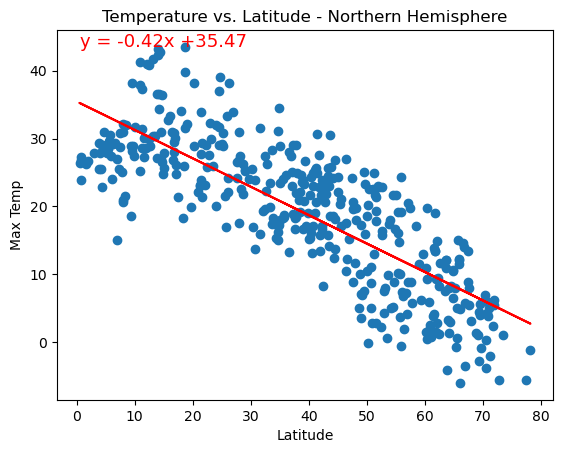

In [15]:
#Linear regression on Northern Hemisphere 
create_lin_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Label and Display
plt.title("Temperature vs. Latitude - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6594604115993131


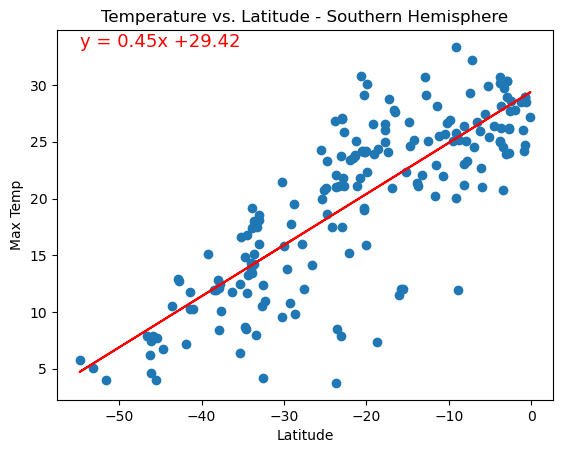

In [16]:
# Linear regression on Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Label plot and annotate the line equation
plt.title("Temperature vs. Latitude - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 


**Northern Hemisphere**

The r-value is: 0.6494375629360046 indicating a MODERATE NEGATIVE CORRELATION between Latitude and Max Temp.
The regression plot demonstates the trend that as the latitude increases from "0" the Max temp steadily declines. 

**Southern Hemisphere** 

The r-value is: 0.6594604115993131 indicating a MODERATE POSITIVE CORRELATION between Latitude and Max Temp.
The regression plot demonstates the trend that as the latitude moves from negative to closer to "0" the Max temp steadily increase. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005602605107570064


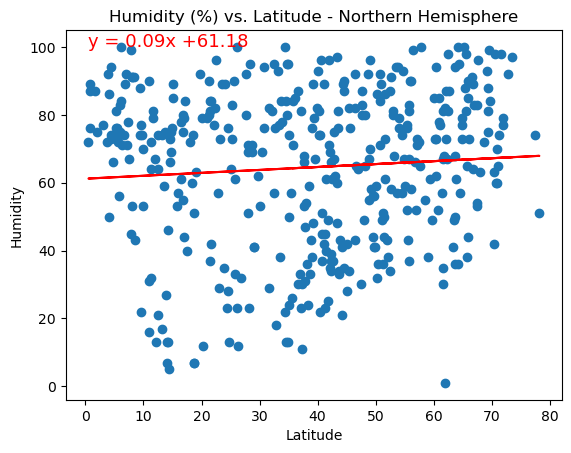

In [17]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Label and Display
plt.title("Humidity (%) vs. Latitude - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.015295798917430936


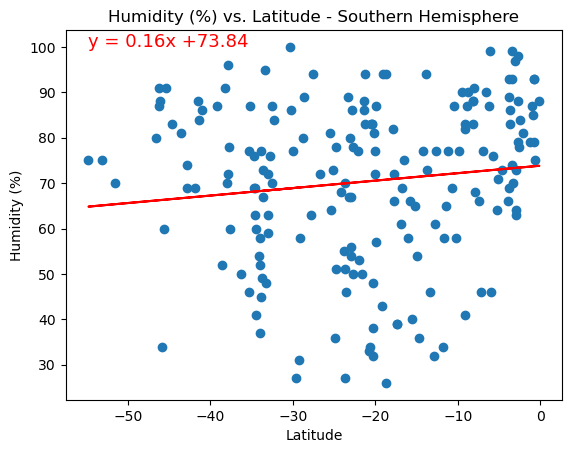

In [18]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Label and Display
plt.title("Humidity (%) vs. Latitude - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** 

**Northern Hemisphere**

The r-value is: 0.005602605107570064 indicating a NONE or VERY WEAK POSITIVE CORRELATION between Latitude and Humidity (%).
The regression plot demonstates there is no obvious trend as the latitude increases from "0" that impacts the Humidity (%).

**Southern Hemisphere**

The r-value is: 0.015295798917430936 indicating a NONE or VERY WEAK POSITIVE CORRELATION between Latitude and Humidity (%).
The regression plot demonstates there is no obvious trend as the latitude moves from negative to closer to "0" the Humidity (%). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0006722049643099564


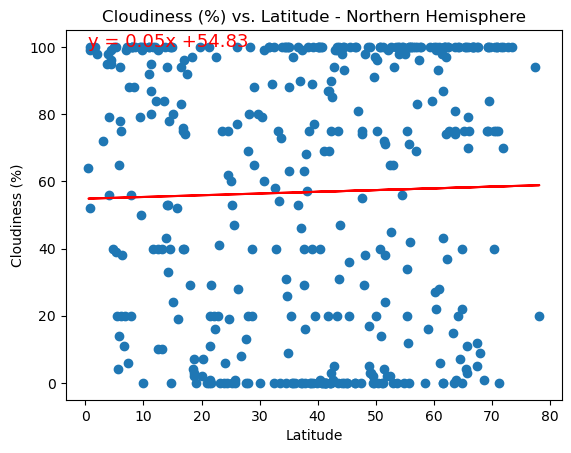

In [19]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Label and Display
plt.title("Cloudiness (%) vs. Latitude - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.06976477993617158


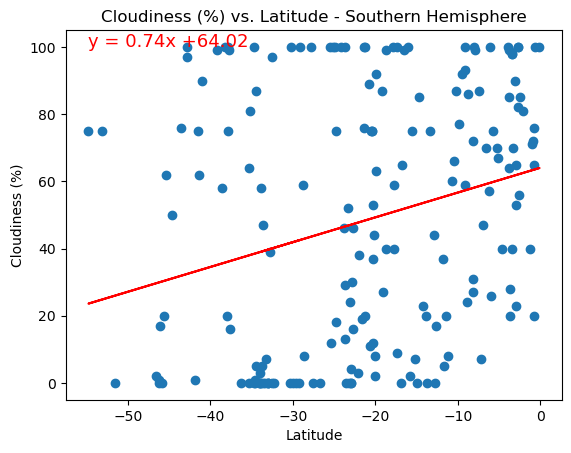

In [20]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Label and Display
plt.title("Cloudiness (%) vs. Latitude - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** 


**Northern Hemisphere**

The r-value is: 0.0006722049643099564 indicating a NONE or VERY WEAK POSITIVE CORRELATION between Latitude and Cloudiness (%).
The regression plot demonstates there is no obvious trend as the latitude increases from "0" that impacts the Cloudiness (%).

**Southern Hemisphere**

The r-value is: 0.06976477993617158 indicating a NONE or VERY WEAK POSITIVE CORRELATION between Latitude and Cloudiness (%).
The regression plot demonstates there is no obvious trend as the latitude moves from negative closer to "0" the Cloudiness (%). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009271683351350033


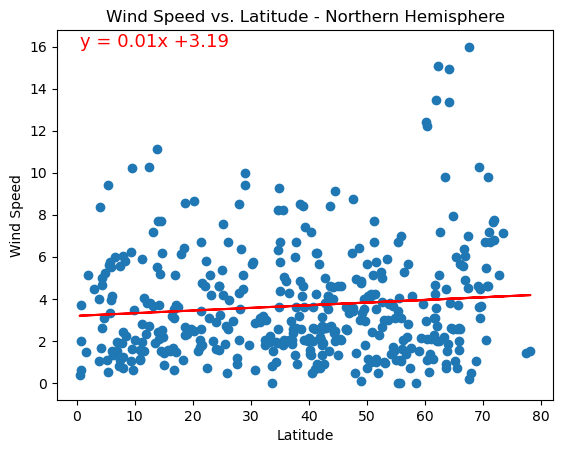

In [21]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Label and Display
plt.title("Wind Speed vs. Latitude - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.06526394614656825


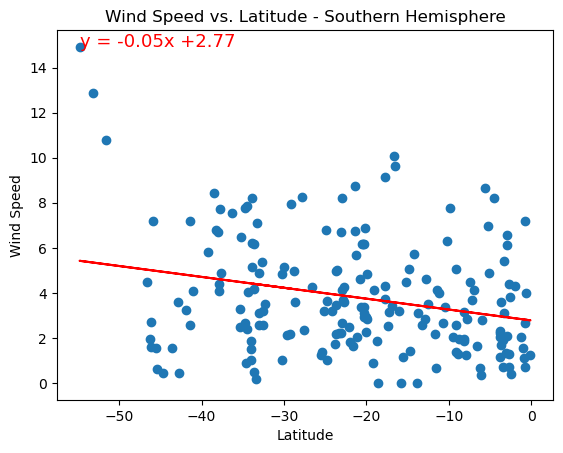

In [22]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Label and Display
plt.title("Wind Speed vs. Latitude - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 


**Northern Hemisphere**

The r-value is: 0.009271683351350033 indicating a NONE or VERY WEAK POSITIVE CORRELATION between Latitude and Wind Speed.
The regression plot demonstates there is possibly a very weak trend as the latitude increases from "0" that the Wind Speed may increase.


**Southern Hemisphere**

The r-value is: 0.06526394614656825 indicating a NONE or VERY WEAK NEGATIVE CORRELATION between Latitude and Wind Speed.
The regression plot demonstates possibly a very weak trend as the latitude moves from negative to closer to "0" the Wind Speed may decrease. but there is no certainty of this. 
